# Using Calculation Setups

Calculation setups are a way to efficiently do LCA calculations for multiple functional units and methods at the same time.

This notebook builds on the `Getting started with Brightway2` notebook, and won't work if you haven't done that notebook yet.

In [1]:
from brightway2 import *

In [2]:
if "Calculation setups" not in projects:
    projects.set_current("BW2 introduction")
    projects.copy_project("Calculation setups")
else:
    projects.set_current("Calculation setups")

## Defining a calculation setup

A calculation setups is defined by three things:
* A name
* A list of functional units
* A list of LCIA methods

In this example, we will choose both activities and methods at random.

In [3]:
functional_units = [{Database('forwast').random(): 1} for _ in range(20)]

We can't choose methods completely at random, though, as the `forwast` database doesn't have as many biosphere flows as ecoinvent, so many methods will only characterize flows that aren't provided anywhere in `forwast`. So lets only choose from the methods which will have a non-zero LCA score:

In [4]:
import random

all_forwast_flows = {exc.input for ds in Database("forwast") for exc in ds.biosphere()}
suitable_methods = [method 
                    for method in methods 
                    if {cf[0] for cf in Method(method).load()}.intersection(all_forwast_flows)]

print("Can use {} of {} LCIA methods".format(len(suitable_methods), len(methods)))
chosen_methods = random.sample(suitable_methods, 8)

Can use 306 of 665 LCIA methods


A calculation setup is a normal Python dictionary, with keys `inv` and `ia`, for the functional units and LCIA methods, respectively.

In [5]:
my_calculation_setup = {'inv': functional_units, 'ia': chosen_methods}

You define a calculation setup by name in the metadata store `calculation_setups`, similar to the way that LCIA methods are defined.

In [6]:
calculation_setups['some random stuff'] = my_calculation_setup

We can examine what we have just randomly created:

In [7]:
calculation_setups['some random stuff']

{'ia': [('ReCiPe Midpoint (H)', 'metal depletion', 'MDP'),
  ('EDIP w/o LT',
   'environmental impact w/o LT',
   'human toxicity, via surface water w/o LT'),
  ('ReCiPe Midpoint (E) w/o LT', 'fossil depletion w/o LT', 'FDP w/o LT'),
  ('EDIP2003 w/o LT', 'non-renewable resources w/o LT', 'aluminium w/o LT'),
  ('ecological footprint', 'total', 'total'),
  ('ReCiPe Endpoint (H,A) w/o LT', 'resources w/o LT', 'total w/o LT'),
  ('EDIP2003', 'photochemical ozone formation', 'impacts on human health'),
  ('ecological scarcity 2006', 'total', 'energy resources')],
 'inv': [{'_89 Post and telecommunication, EU27' (EUR2003, GLO, ['Input Output', 'EU27 2003']): 1},
  {'_73 Furniture and other manufactured goods n.e.c., EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']): 1},
  {'__1 Bovine meat and milk, EU27' (kilogram, GLO, ['Input Output', 'EU27 2003']): 1},
  {'130 Membership organisations, EU27' (EUR2003, GLO, ['Input Output', 'EU27 2003']): 1},
  {'_58 Office machinery and computers, D

The normal create, update, and delete machanisms apply:
* To create a new calculation setup, assign by name, as in cell above
* To replace a calculation setup, just assign new data, i.e. `calculation_setups['some random stuff'] = some_new_stuff`.
* To delete a calculation setup, use `del`, i.e. `del calculation_setups['some random stuff']`.

## Using a calculation setup

Use the `MultiLCA` class to get LCA results for a calculation setup. Note that this class does all the calculations as soon as you create it.

In [8]:
mlca = MultiLCA('some random stuff')

In [9]:
mlca.results

array([[  2.01992360e-02,   5.41100722e-06,   8.46148810e-02,
          6.61679078e-04,   1.42901040e+00,   1.17617425e-02,
          1.28948520e-04,   1.27063423e+01],
       [  3.42570244e-01,   7.08964005e-05,   1.07109057e+00,
          2.16505158e-02,   1.70176907e+01,   1.52923265e-01,
          1.69952888e-03,   1.60852771e+02],
       [  8.54603999e-02,   8.20893591e-05,   8.59786378e-01,
          2.41886966e-03,   1.35256790e+01,   1.14021466e-01,
          1.02473129e-02,   1.29275666e+02],
       [  1.38804898e-02,   9.26976794e-06,   1.40957937e-01,
          4.54331969e-04,   2.48256765e+00,   1.86521880e-02,
          2.23869508e-04,   2.11117955e+01],
       [  3.34442558e+00,   3.32505885e-04,   5.29992430e+00,
          2.08351234e-01,   7.90777941e+01,   8.33465266e-01,
          7.67466305e-03,   7.96400917e+02],
       [  2.65436174e-03,   1.79663207e-06,   2.71179542e-02,
          4.83997043e-05,   3.35531721e-01,   3.59813477e-03,
          3.63611861e-05,   4.0

## Visualizing the results

There isn't any code built into Brightway2 yet, but [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html) has some great visualizations for this type of result array.

In [10]:
%matplotlib inline

You can ignore any errors that show up here.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Text xticklabel objects>)

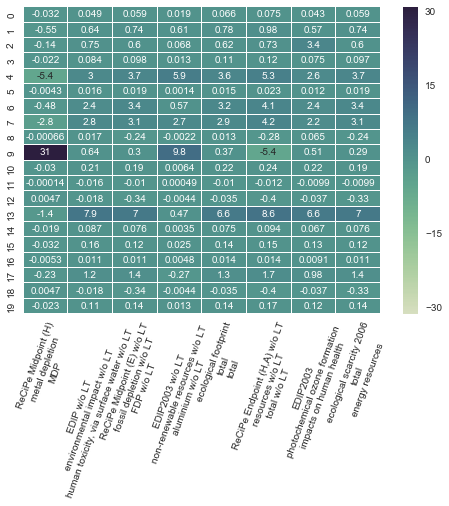

In [12]:
# From https://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html
cmap = sns.cubehelix_palette(8, start=.5, rot=-.75, as_cmap=True) 

sns.heatmap(
    mlca.results / np.average(mlca.results, axis=0), # Normalize to get relative results
    annot=True, 
    linewidths=.05, 
    cmap=cmap, 
    xticklabels=["\n".join(x) for x in mlca.methods]
)
plt.xticks(rotation=70) 

Could also adapt https://stanford.edu/~mwaskom/software/seaborn/examples/structured_heatmap.html, but this is more work.